## Начало лабораторной работы

Выгрузка данных из csv-файла в датафрейм:

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("..//..//static//csv//healthcare-dataset-stroke-data.csv")

print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


## Диаграмма №1 (Круговая)

Данная круговая диаграмма отображает распределение людей, перенесших инсульт, по их месту жительства. Это позволяет сделать вывод о том, что место, где  живет человек, оказывает определенное влияние на вероятность инсульта. Так, у людей проживающих в сельской местности такая вероятность  меньше, чем у жителей города.

Text(0.5, 1.0, 'Распределение людей с инсультом по месту жительства')

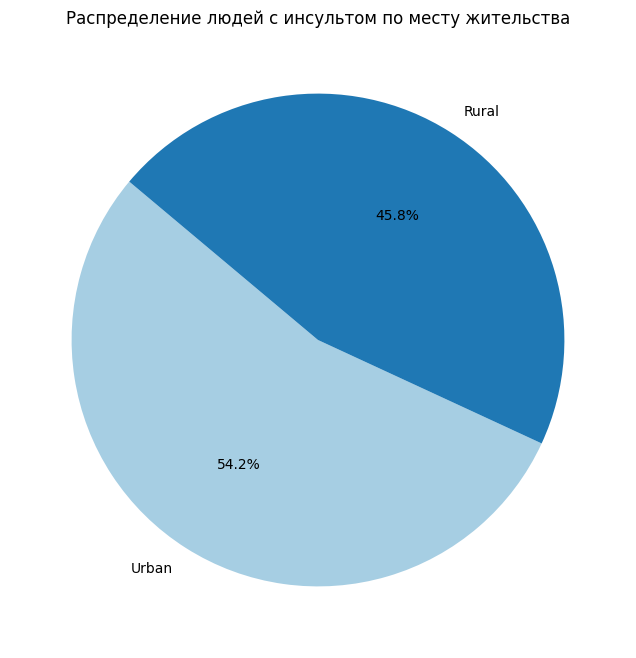

In [159]:
stroke_df = df[df['stroke'] == 1]

residence_type_counts = stroke_df['Residence_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(residence_type_counts, labels=residence_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Распределение людей с инсультом по месту жительства')

## Диаграмма №2 (Столбчатая диаграмма)

Данная столбчатая диаграмма построена на срезе данных, который содержит первых 100 пациентов с инсультом, и отображает их распределение по возрастным группам, включая разбивку по полу. Видно, что вероятность инсульта значительно увеличивается с возрастом, особенно начиная с 51 года, причём в группе 51-65 лет риск инсульта выше у мужчин, а в группе 66+ — у женщин. В более раннем возрасте инсульт одинаково опасен для представителей обоих полов.

C:\Users\Ilya\AppData\Local\Temp\ipykernel_22732\92582056.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_by_age_and_gender = stroke_patients.groupby(['age_group', 'gender']).size().unstack()


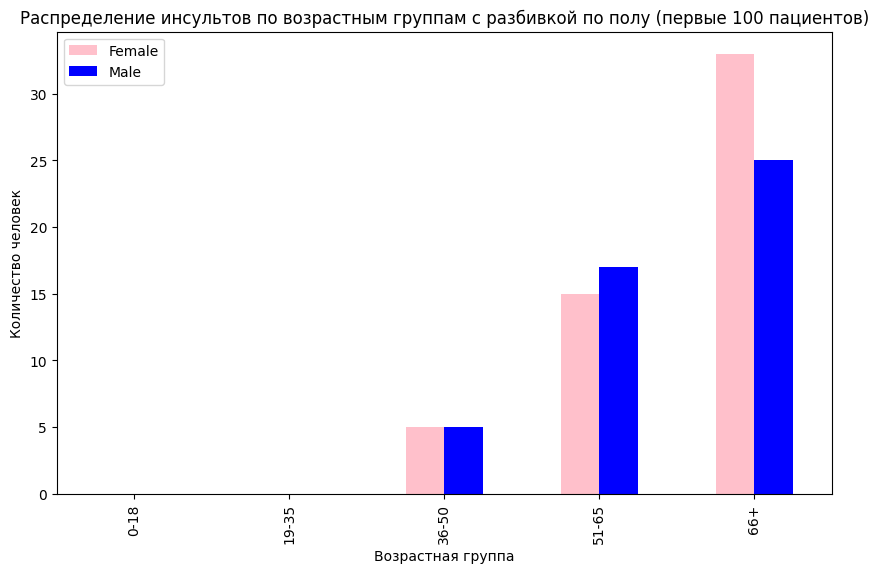

In [160]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])

stroke_patients = df[df['stroke'] == 1].head(100)

stroke_by_age_and_gender = stroke_patients.groupby(['age_group', 'gender']).size().unstack()

plot = stroke_by_age_and_gender.plot(kind='bar', stacked=False, figsize=(10, 6), color=["pink", "blue"])
plot.set_title('Распределение инсультов по возрастным группам с разбивкой по полу (первые 100 пациентов)')
plot.set_xlabel('Возрастная группа')
plot.set_ylabel('Количество человек')
plt.legend(["Female", "Male"])

## Диаграмма №3 (Линейный график)

Данная диаграмма отображает средний уровень глюкозы в различных возрастных группах для людей, у которых был инсульт и у которых его не было. Из нее можно сделать вывод о том, что уровень глюкозы у людей с инсультом отличается от уровня здоровых людей (понижен в молодости, при этом в более зрелом возрасте повышен).

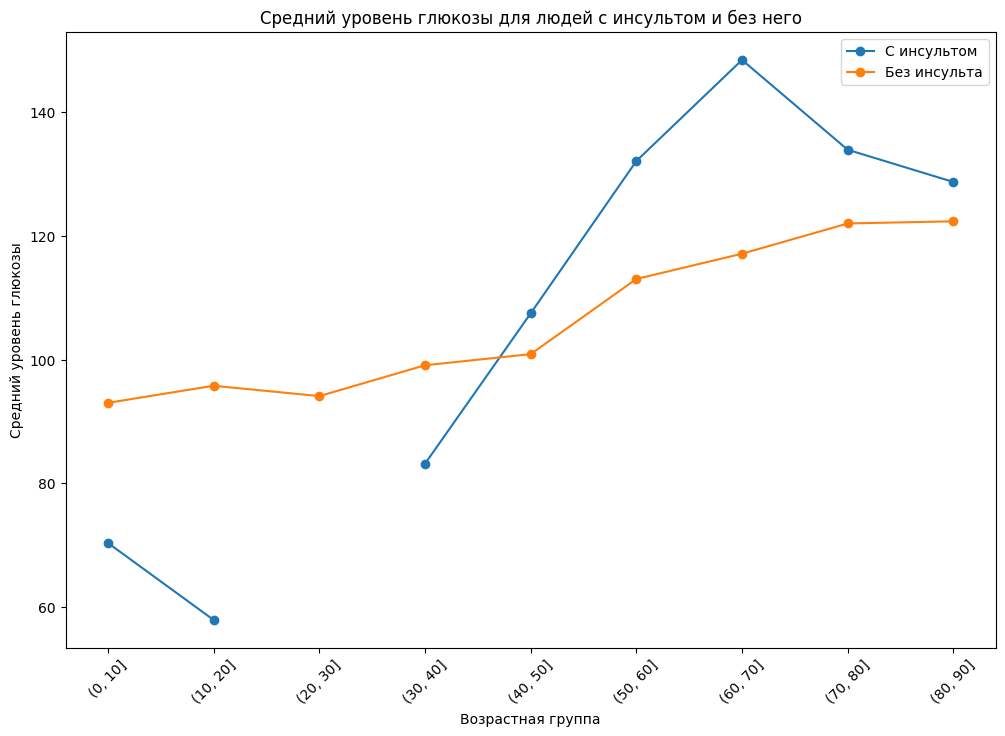

In [161]:
stroke_patients = df[df['stroke'] == 1].copy()  
no_stroke_patients = df[df['stroke'] == 0].copy()  

age_bins = range(0, 101, 10)  

stroke_patients['age_group'] = pd.cut(stroke_patients['age'], bins=age_bins)
mean_glucose_stroke = stroke_patients.groupby('age_group', observed=False)['avg_glucose_level'].mean()

no_stroke_patients['age_group'] = pd.cut(no_stroke_patients['age'], bins=age_bins)
mean_glucose_no_stroke = no_stroke_patients.groupby('age_group', observed=False)['avg_glucose_level'].mean()

plt.figure(figsize=(12, 8))
plt.plot(mean_glucose_stroke.index.astype(str), mean_glucose_stroke, marker='o', label='С инсультом')
plt.plot(mean_glucose_no_stroke.index.astype(str), mean_glucose_no_stroke, marker='o', label='Без инсульта')
plt.xlabel('Возрастная группа')
plt.ylabel('Средний уровень глюкозы')
plt.title('Средний уровень глюкозы для людей с инсультом и без него')
plt.xticks(rotation=45)
plt.legend()


